# Decision Trees
Jose Alberto Gonzalez Arteaga A01038061

## Configs

In [ ]:
#Python >= 3.5 required
import sys
assert sys.version_info >= (3,5)
#Scikit-Learn >= 0.20 is required
import sklearn
assert sklearn.__version__ >="0.20"
#imports
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from graphviz import Source
from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeClassifier
from matplotlib.colors import ListedColormap
from sklearn.linear_model import LogisticRegression
import os

In [ ]:
#Configs dirs for images
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "decision_trees"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID,)
os.makedirs(IMAGES_PATH, exist_ok=True)

In [ ]:
#save fig functions on the directory
def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
  path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
  print("Saving figure", fig_id)
  if tight_layout:
    plt.tight_layout()
  plt.savefig(path, format=fig_extension, dpi=resolution)

In [ ]:
#Batch Gradient Descent Algorithm
def sigmoid(x):
  return 1.0 / (1 + np.exp(-x))

def lr_hypothesis(x, theta):
  return np.dot(x,theta)

#return hb_opt => 
def batchGradientDescent(X, y, b0 = 0.5, ALPHA = 0.25, max_it=5000, 
                         threshold = 1 * pow(10,-4)):
  
  #prepare data
  X = X.values
  y = y.values
  
  zm, zn = X.shape
  z = np.ones(zm)
  z = z.reshape(zm, 1)
  X = np.append(z,X,axis=1)

  m, n = X.shape
  theta = np.zeros(n) * b0
  theta = theta.reshape(n,1)
  y = y.reshape(-1,1)
  diff = 1
  j = 0
  
  while j < max_it and diff > threshold:
    last_t = theta
    infunc1 = sigmoid(lr_hypothesis(X, theta)) - y
    gradient = np.dot(X.T, infunc1) / m
    theta = theta - (ALPHA / m) * gradient
    diff = np.linalg.norm(last_t-theta)
    j+=1
  return theta, j

In [ ]:
#Testing functions

#return if classify in 1 or 0.
def classify(x):
  return int(x > 0.5)

#compare data
def compare(y_hat, y):
  return np.where(y_hat == y, 0, 1)

#return error
def error(y_hat, y, T):
  return 1 / T * sum(compare(y_hat, y))

#Apply model with values to predict probability of 1.
def predict(model, X):
  X = X.values
  X = np.insert(X, 0, 1.0)
  return sigmoid(np.dot(model.T, X))

## Iris dataset


In [ ]:
#import dataset and transform to csv
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data[:, 2:] # work only with petal length and width
y = iris.target

In [ ]:
#Split data for traning and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

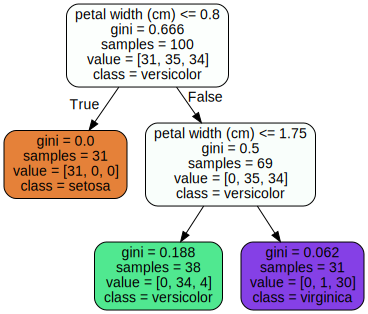

In [ ]:
#Decision tree fit with the training data
tree_clf = DecisionTreeClassifier(max_depth = 2, random_state=0)
tree_clf = tree_clf.fit(X_train, y_train)

#Create tree view
export_graphviz(
    tree_clf,
    out_file = os.path.join(IMAGES_PATH, "iris_tree.dot"),
    feature_names = iris.feature_names[2:],
    class_names = iris.target_names,
    rounded=True,
    filled=True
)

Source.from_file(os.path.join(IMAGES_PATH, "iris_tree.dot"))

In [ ]:
#Calculate Accuracy: correct predictions / total number of data points
score = tree_clf.score(X_test, y_test)
print("Score of iris dataset with Decision tree model: ", score)

Score of iris dataset with Decision tree model:  0.98


Saving figure decision_tree_decision_boundaries_plot


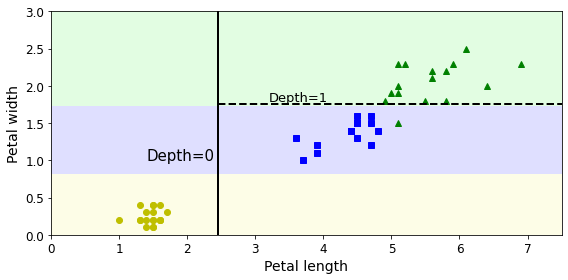

In [ ]:
#Visualization by each split: need to work only with binary classifications
def plot_decision_boundary(clf, X, y, axes=[0, 7.5, 0, 3], iris=True, legend=False, plot_training=True):
  x1s = np.linspace(axes[0], axes[1], 100)
  x2s = np.linspace(axes[2], axes[3], 100)
  x1, x2 = np.meshgrid(x1s, x2s)
  X_new = np.c_[x1.ravel(), x2.ravel()]
  y_pred = clf.predict(X_new).reshape(x1.shape)
  custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
  plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
  if not iris:
    custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
    plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
  if plot_training:
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris setosa")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris versicolor")
    plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label="Iris virginica")
    plt.axis(axes)
  if iris:
    plt.xlabel("Petal length", fontsize=14)
    plt.ylabel("Petal width", fontsize=14)
  else:
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
  if legend:
    plt.legend(loc="lower right", fontsize=14)

plt.figure(figsize=(8, 4))
plot_decision_boundary(tree_clf, X_test, y_test)
plt.plot([2.45, 2.45], [0, 3], "k-", linewidth=2)
plt.plot([2.45, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.text(1.40, 1.0, "Depth=0", fontsize=15)
plt.text(3.2, 1.80, "Depth=1", fontsize=13)
save_fig("decision_tree_decision_boundaries_plot")
plt.show()

In [ ]:
print("Iris Figs generated in: ", IMAGES_PATH)

Iris Figs generated in:  ./images/decision_trees


## Wine dataset


In [ ]:
#import dataset and transform to csv
from sklearn.datasets import load_wine
wine = load_wine()
df_wine = pd.DataFrame(data=wine['data'], columns=wine['feature_names'])
df_wine['target'] = wine['target']

In [ ]:
df_wine.sample(5)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
108,12.22,1.29,1.94,19.0,92.0,2.36,2.04,0.39,2.08,2.70,0.86,3.02,312.0,1
142,13.52,3.17,2.72,23.5,97.0,1.55,0.52,0.50,0.55,4.35,0.89,2.06,520.0,2
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
25,13.05,2.05,3.22,25.0,124.0,2.63,2.68,0.47,1.92,3.58,1.13,3.20,830.0,0
10,14.10,2.16,2.30,18.0,105.0,2.95,3.32,0.22,2.38,5.75,1.25,3.17,1510.0,0


In [ ]:
df_wine.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


In [ ]:
#Split data for traning and testing
featuresNames = df_wine.columns[:-1]
classNames = 'target'
X_train, X_test, y_train, y_test = train_test_split(df_wine[featuresNames], df_wine[classNames], test_size=0.33, random_state=42)

In [ ]:
wine.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

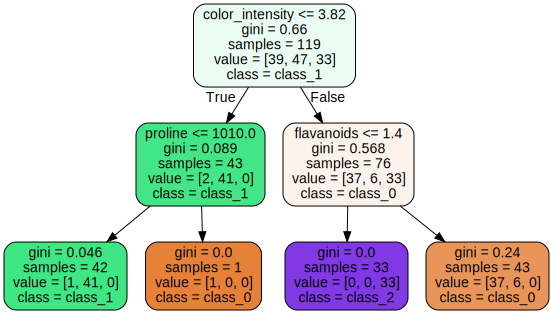

In [ ]:
#Decision tree fit with the training data
tree_clf = DecisionTreeClassifier(max_depth = 2, random_state=0)
tree_clf = tree_clf.fit(X_train, y_train)

#Create tree view
export_graphviz(
    tree_clf,
    out_file = os.path.join(IMAGES_PATH, "wine_tree.dot"),
    feature_names = featuresNames,
    class_names = wine.target_names,
    rounded=True,
    filled=True
)

Source.from_file(os.path.join(IMAGES_PATH, "wine_tree.dot"))

In [ ]:
#Calculate Accuracy: correct predictions / total number of data points
score = tree_clf.score(X_test, y_test)
print("Score of wine dataset Decision Tree model: ", score)

Score of wine dataset Decision Tree model:  0.8813559322033898


In [ ]:
print("Wine Figs generated in: ", IMAGES_PATH)

Wine Figs generated in:  ./images/decision_trees


## Breast Cancer dataset


In [ ]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
df_cancer = pd.DataFrame(data=cancer['data'], columns=cancer['feature_names'])
df_cancer['target'] = cancer['target']

In [ ]:
df_cancer.sample(5)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
350,11.66,17.07,73.70,421.0,0.07561,0.03630,0.008306,0.01162,0.1671,0.05731,0.3534,0.6724,2.225,26.03,0.006583,0.006991,0.005949,0.006296,0.02216,0.002668,13.28,19.74,83.61,542.5,0.09958,0.06476,0.03046,0.04262,0.2731,0.06825,1
385,14.60,23.29,93.97,664.7,0.08682,0.06636,0.083900,0.05271,0.1627,0.05416,0.4157,1.6270,2.914,33.01,0.008312,0.017420,0.033890,0.015760,0.01740,0.002871,15.79,31.71,102.20,758.2,0.13120,0.15810,0.26750,0.13590,0.2477,0.06836,0
340,14.42,16.54,94.15,641.2,0.09751,0.11390,0.080070,0.04223,0.1912,0.06412,0.3491,0.7706,2.677,32.14,0.004577,0.030530,0.038400,0.012430,0.01873,0.003373,16.67,21.51,111.40,862.1,0.12940,0.33710,0.37550,0.14140,0.3053,0.08764,1
86,14.48,21.46,94.25,648.2,0.09444,0.09947,0.120400,0.04938,0.2075,0.05636,0.4204,2.2200,3.301,38.87,0.009369,0.029830,0.053710,0.017610,0.02418,0.003249,16.21,29.25,108.40,808.9,0.13060,0.19760,0.33490,0.12250,0.3020,0.06846,0
99,14.42,19.77,94.48,642.5,0.09752,0.11410,0.093880,0.05839,0.1879,0.06390,0.2895,1.8510,2.376,26.85,0.008005,0.028950,0.033210,0.014240,0.01462,0.004452,16.33,30.86,109.50,826.4,0.14310,0.30260,0.31940,0.15650,0.2718,0.09353,0


In [ ]:
df_cancer.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [ ]:
#Split data for traning and testing
featuresNames = df_cancer.columns[:-1]
classNames = 'target'
X_train, X_test, y_train, y_test = train_test_split(df_cancer[featuresNames], df_cancer[classNames], test_size=0.33, random_state=42)

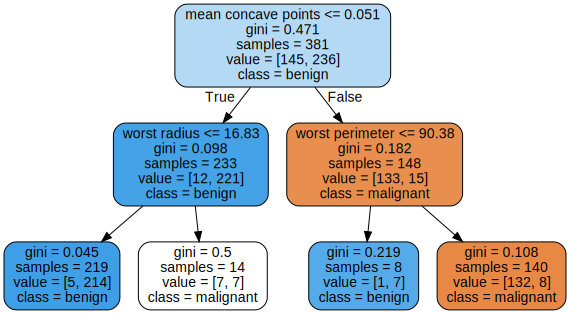

In [ ]:
#Decision tree fit with the training data
tree_clf = DecisionTreeClassifier(max_depth = 2, random_state=0)
tree_clf = tree_clf.fit(X_train, y_train)

#Create tree view
export_graphviz(
    tree_clf,
    out_file = os.path.join(IMAGES_PATH, "cancer_tree.dot"),
    feature_names = featuresNames,
    class_names = cancer.target_names,
    rounded=True,
    filled=True
)

Source.from_file(os.path.join(IMAGES_PATH, "cancer_tree.dot"))

In [ ]:
#Calculate Accuracy: correct predictions / total number of data points
score = tree_clf.score(X_test, y_test)
print("Score of cancer dataset with Decision tree model: ", score)

Score of cancer dataset with Decision tree model:  0.925531914893617


In [ ]:
print("Cancer Figs generated in: ", IMAGES_PATH)

Cancer Figs generated in:  ./images/decision_trees


In [ ]:
#Use logisticRegression
model, j = batchGradientDescent(X_train, y_train, 0.5, 0.05, 1000, 0.0001)
print('Logistic Regression Batch Gradient model B vector: ')
print(model)
print('Logistic Regression Batch Gradient model iterations: ', j)

Logistic Regression Batch Gradient model B vector: 
[[ 5.19002538e-03]
 [ 3.94178949e-02]
 [ 5.06840375e-02]
 [ 2.26078950e-01]
 [ 7.00409666e-02]
 [ 3.45919117e-04]
 [-2.60422128e-04]
 [-8.41090749e-04]
 [-3.52188473e-04]
 [ 6.43102505e-04]
 [ 2.80234589e-04]
 [ 3.41397454e-05]
 [ 3.59657601e-03]
 [-2.14427130e-03]
 [-1.13606862e-01]
 [ 1.54041619e-05]
 [-8.49730103e-05]
 [-1.33610922e-04]
 [-2.07638584e-05]
 [ 4.81898621e-05]
 [ 1.43900677e-06]
 [ 4.19910129e-02]
 [ 6.32815497e-02]
 [ 2.29523014e-01]
 [-1.08205178e-01]
 [ 4.16043894e-04]
 [-1.03349404e-03]
 [-1.83982333e-03]
 [-4.37866008e-04]
 [ 7.98218887e-04]
 [ 2.44795290e-04]]
Logistic Regression Batch Gradient model iterations:  1000


In [ ]:
#Test model

#predict values
y_predicted_value = X_test.apply(lambda x: predict(model, x), axis=1)
#Classify values
y_predicted = y_predicted_value.apply(classify)
#error
print('error of cancer dataset with BatchGradient model: ', error(y_predicted, y_test, y_predicted.size))
print('score  of cancer dataset with BatchGradient model: ', 1-error(y_predicted, y_test, y_predicted.size))

error of cancer dataset with BatchGradient model:  0.03723404255319149
score  of cancer dataset with BatchGradient model:  0.9627659574468085


In [ ]:
#Logistic Regression with SciKit-Learn
model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)
print("coef of cancer dataset with SciKit-Learn model:", model.coef_)
print("bias od cancer dataset with SciKit-Learn model:", model.intercept_)
print("max_iters of model:", 10000)

coef of cancer dataset with SciKit-Learn model: [[ 1.09883505  0.28868759 -0.38977797  0.02455496 -0.134225   -0.19903304
  -0.49091186 -0.27820563 -0.22557244 -0.03485095 -0.10897378  1.4049082
   0.30178012 -0.13988568 -0.02263297  0.02184427 -0.03989813 -0.03396731
  -0.04227561  0.00269386  0.07479064 -0.54879772 -0.08845624 -0.00859102
  -0.29337887 -0.5721096  -1.20447    -0.47536885 -0.721076   -0.08566283]]
bias od cancer dataset with SciKit-Learn model: [32.20575586]
max_iters of model: 10000


In [ ]:
#error with SciKit-Learn
y_hat = model.predict(X_test)
print('error of cancer dataset with SciKit-Learn model:', error(y_hat, y_test, y_hat.size))
print('Score of cancer dataset SciKit-Learn model:', 1-error(y_hat, y_test, y_hat.size))

error of cancer dataset with SciKit-Learn model: 0.031914893617021274
Score of cancer dataset SciKit-Learn model: 0.9680851063829787
